<a href="https://colab.research.google.com/github/hsantos1985/Datasets_analysis/blob/main/Case_empresa_entregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Empresa
Os dados são pertencentes a uma empresa de entregas

#Objetivo
Criar um modelo que possa prever se o cliente irá aceitar uma nova campanha ou não
Tirar insights dos datasets

#Dados
O data set contém variáveis sociodemográficas e firmográficas de 2240 consumidores que foram contatados pela empresa em campanhas anteriores

#Variavel target
Response(target) 1 se o cliente aceitou a oferta da últia campanha e 0 o contrário

#Etapas para execução
Para realizar a análise serão executadas as etapas abaixo:

1 - Importar as biliotecas

Importar as bibliotecas necessárias para executar o case

2 - Análise inicial do dataset

Baixar o dataset e fazer análises iniciais das variáveis (tipos e valores faltantes)

3 - EDA (Análise exporatória de dados)

Executar a análise exploratória de dados para obter as análises descritivas das variáveis e possíveis trataentos para os valores faltantes

4 - Criação do modelo preditivo

Criar o modelo preditivo

5 - Medição da qualidade do modelo

Análisar os indicadores da qualidade do modelo para verificar se este está adequado

6 - Testagem de outros modelos

Aplicar outros modelos de classificação para verificar se estes serão melhores

7 - Conclusão

Fazer a conclusão do modelo





#1 - Importar as bibliotecas

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#2 - Análise inicial do dataset

In [ ]:
#conectando ao Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lendo o arquivo csv
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
#Verificando inicialmente as variáveis
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Verificando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Contando as variáveis e suas médias valores maximo, mim, entre outros
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
#Conclusão inicial da etapa 2
#verificou- se que apenas a variável "Income" possui valores faltantes
#para preencher estes valores faltantes será inserido a média dos valores faltantes pelo ano d enascimento

In [ ]:
# Inserção dos valores faltantes na variável Income, desta forma será inserido os valores de renda pela média do ano de nascimento
df['Income'].isnull().sum()

24

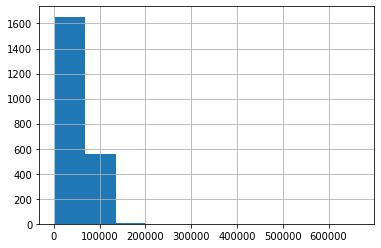

In [ ]:
#Plotando esta variável antes do preenchimento da média
df['Income'].hist();

In [ ]:
#inserindo as médias por ano na variável "Income"
df['Income']=df.groupby('Year_Birth')['Income'].apply(lambda grp:grp.fillna(np.mean(grp)))

In [ ]:
#Contando os nulos após a inserção dos dados
df['Income'].isnull().sum()

0

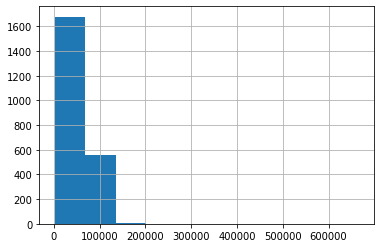

In [ ]:
#Verificando a distribuições da variável "Income" após a inserção dos dados não nulos
df['Income'].hist();

In [ ]:
#Verifica-se que não houve modificação da distribuição da variável ao inserir a média

#3 EDA (Análise Exporatória de Dados)

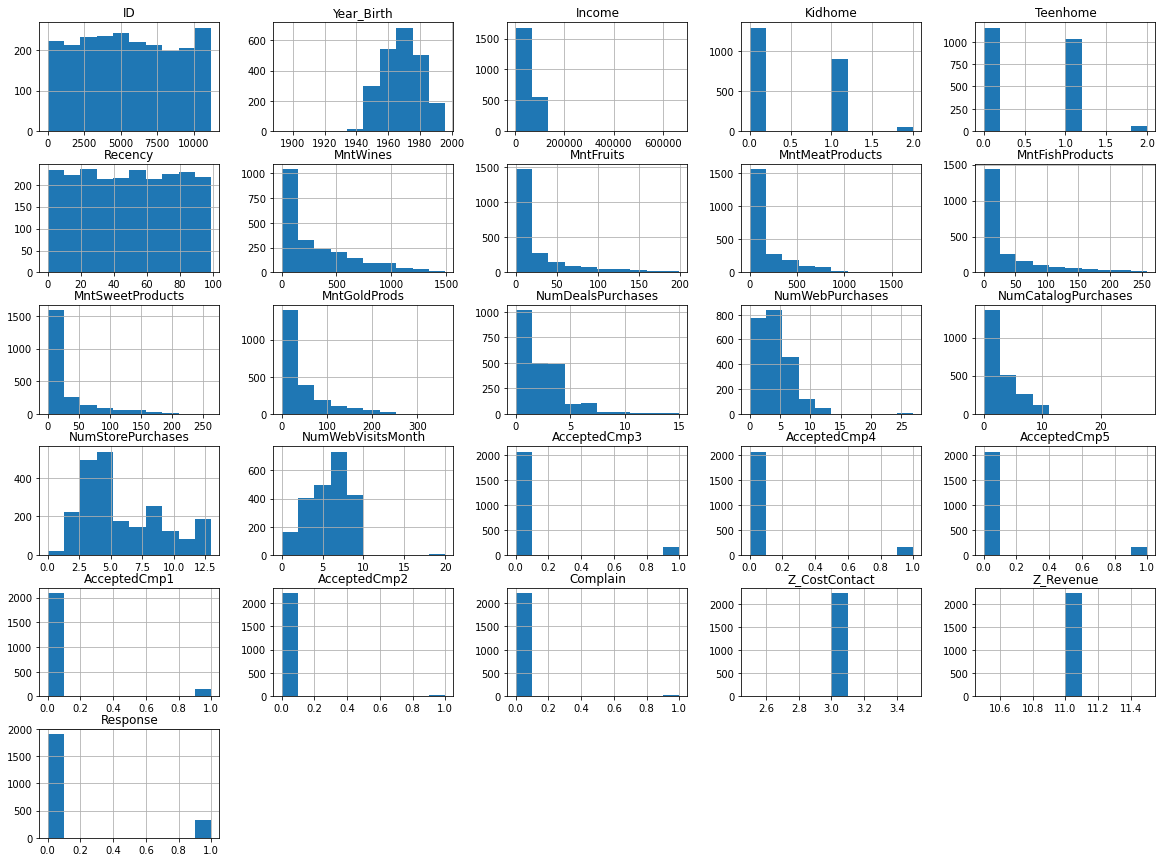

In [ ]:
#analisando o histograma das variáveis
df.hist(figsize=(20,15))
plt.show();

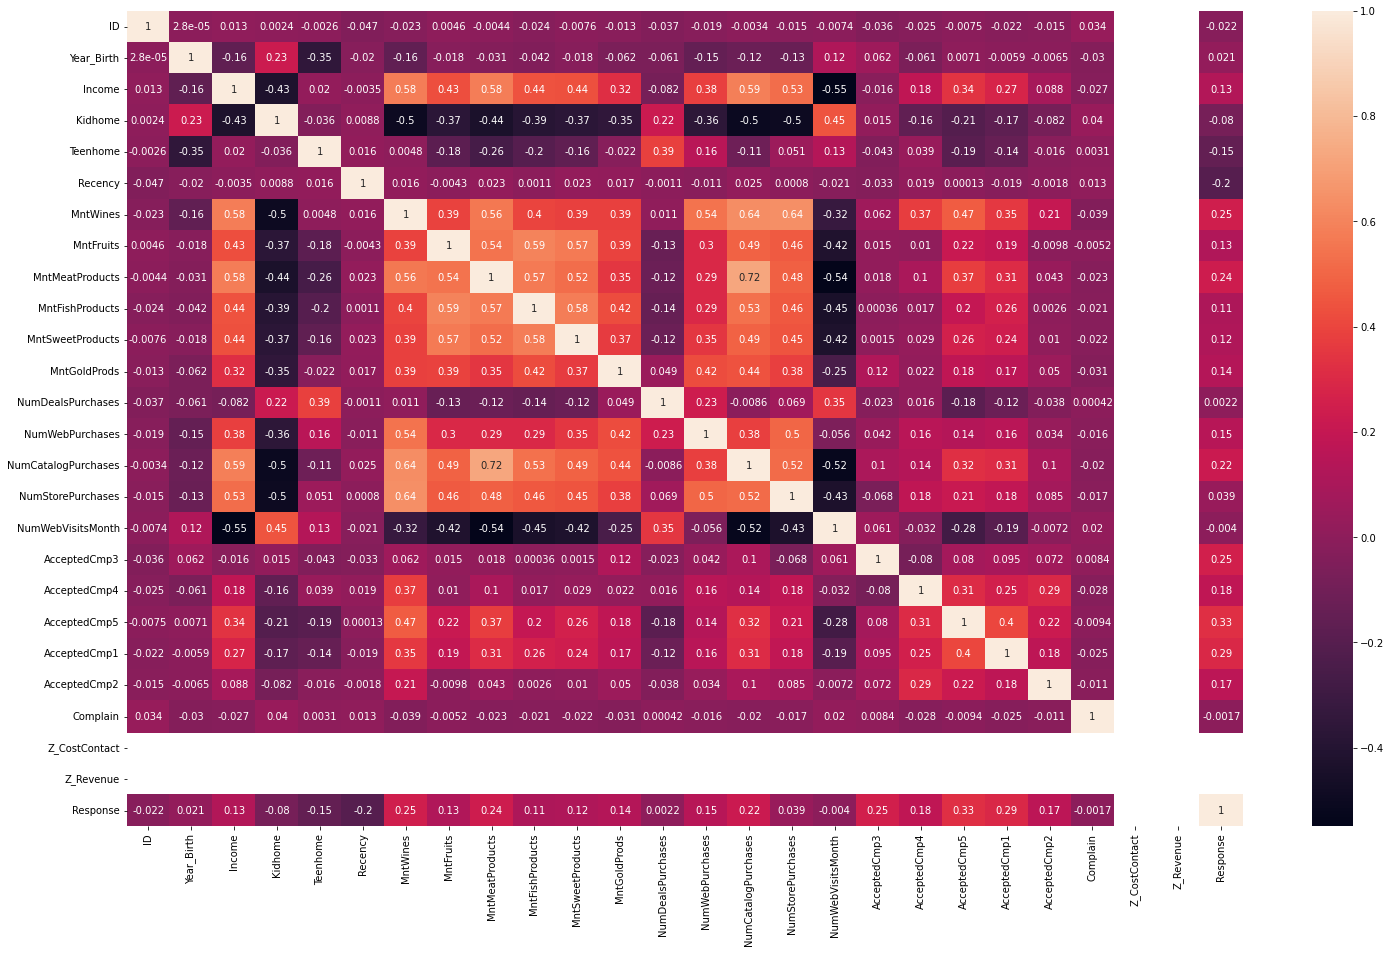

In [ ]:
# matriz de correlação
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#filtrando as variáveis com correlação maior que 0.5
df_cor=df.corr(method='pearson').abs()
df_cor[df_cor>=0.5].T

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.000000,NaN,NaN,NaN,0.576615,NaN,0.576827,NaN,...,0.549210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,0.576615,NaN,NaN,NaN,1.000000,NaN,0.562667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.543105,0.594804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,0.576827,NaN,NaN,NaN,0.562667,0.543105,1.000000,0.568402,...,0.539470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594804,0.568402,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


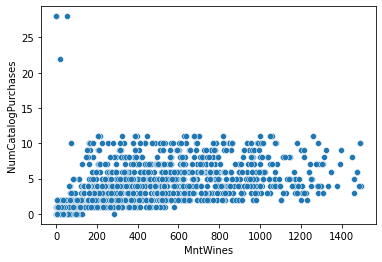

In [ ]:
#Analisando a correlação entre MntWines e NumCatalogPurchases
sns.scatterplot(x=df['MntWines'], y=df['NumCatalogPurchases'])

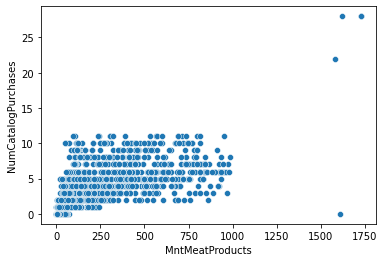

In [ ]:
#Analisando a correlação entre MntMeatProducts e NumCatalogPurchases
sns.scatterplot(x=df['MntMeatProducts'], y=df['NumCatalogPurchases'])

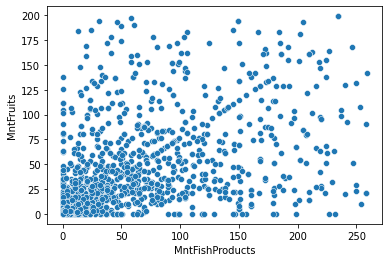

In [ ]:
#Analisando a correlação entre MntFishProducts e MntFruits
sns.scatterplot(x=df['MntFishProducts'], y=df['MntFruits'])

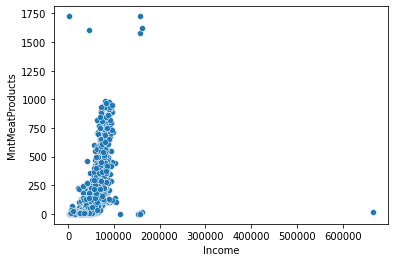

In [ ]:
#Analisando a correlação entre Income e MntMeatProducts
sns.scatterplot(x=df['Income'], y=df['MntMeatProducts'])

In [ ]:
#Analisando a etapa de EDA verificou-se que não há uma relação de causalidade entre as variáveis que possui correlações
#Variáveis como MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts e MntGoldProds possuem distribuições parecidas

#4 - Criação do modelo preditivo

In [ ]:
#Criando as variáveis x e y

x=df.drop(columns=['Response','Dt_Customer'],axis=1) #dropando o target
y=df['Response']

In [ ]:
#Criando o as variáveis train, test,split
x_train, x_test, y_train, y_test = train_test_split(x, y) #fazendo o split

In [ ]:
#criando pipline para a conversão das variáveis e a padronização delas
ct = ColumnTransformer( [ ( 'ohe', OneHotEncoder(), [ 'Education','Marital_Status']  ),
                         ( 'standard', StandardScaler(), ['Income' ] )]
,                         remainder = 'passthrough')

In [ ]:
#criando o modelo de Rehressão Logística através da Pipeline criada
modelo = make_pipeline( ct, LogisticRegression() )

In [ ]:
#fazendo o fit do modelo 
modelo.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#criando a variável predidtiva
y_pred = modelo.predict(x_test)

#5 - Medição da qualidade do modelo

In [ ]:
#Calculando a acurácia, precisão e recall
print( 'Accuracy', accuracy_score( y_test, y_pred ) )
print( 'Precision', precision_score( y_test, y_pred ) )
print( 'Recall', recall_score( y_test, y_pred ) )

Accuracy 0.8392857142857143
Precision 0.5517241379310345
Recall 0.17204301075268819


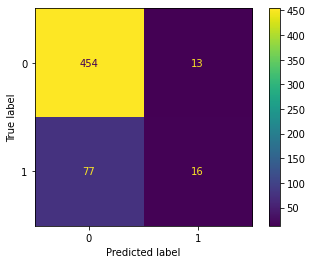

In [ ]:
#Verificando matriz de consufusão
ConfusionMatrixDisplay.from_predictions( y_test, y_pred )

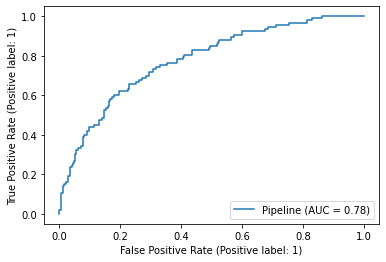

In [ ]:
#plotando a curva ROC
RocCurveDisplay.from_estimator(modelo, x_test, y_test);

In [ ]:
#Conclui-se que o modelo conseguiu classificar de forma correta 86% das vezes
#Isto é em 86% dos casos o modelo vai conseguir prever se o cliente vai aceitar uma nova oferta
#Pela curva ROC foi possível verificar que o modelo conseguiu separar se o cliente iria ou não aceitar uma nova oferta

#7 - Testagem de outros modelos

In [ ]:
classifiers = [
               KNeighborsClassifier(),
               LogisticRegression(),
               SVC(),
               DecisionTreeClassifier(),
               GaussianNB(),
               RandomForestClassifier()
]

for n in classifiers:
  model=make_pipeline(ct,n)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print( '===', n.__class__.__name__, '===' )
  print( 'Accuracy', accuracy_score( y_test, y_pred ) )
  print( 'Precision', precision_score( y_test, y_pred ) )
  print( 'Recall', recall_score( y_test, y_pred ) )

=== KNeighborsClassifier ===
Accuracy 0.8321428571428572
Precision 0.48
Recall 0.12903225806451613
=== LogisticRegression ===
Accuracy 0.8392857142857143
Precision 0.5517241379310345
Recall 0.17204301075268819


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=== SVC ===
Accuracy 0.8339285714285715
Precision 0.0
Recall 0.0
=== DecisionTreeClassifier ===
Accuracy 0.8125
Precision 0.4473684210526316
Recall 0.5483870967741935
=== GaussianNB ===
Accuracy 0.8089285714285714
Precision 0.4406779661016949
Recall 0.5591397849462365
=== RandomForestClassifier ===
Accuracy 0.8571428571428571
Precision 0.6857142857142857
Recall 0.25806451612903225


In [ ]:
# Através da testagem dos outros modelos verificou-se que a acurácia e precisão é melhor com o modelo de Random Forest
#O Recall é melhor no modelo de Gaussiano NB